# Exploratory Data Analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#train =pd.read_csv('train.csv',index_col='PassengerId')
train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing Data Handling

In [6]:
train.isnull().head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False


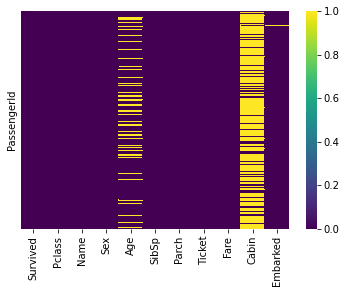

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


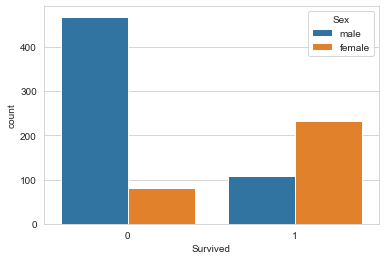

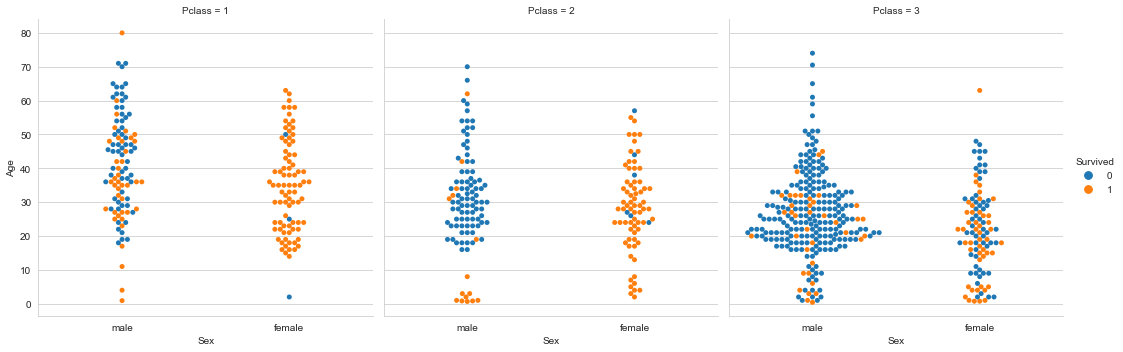

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train)
sns.factorplot('Sex','Age','Survived',col='Pclass', data=train,kind='swarm')

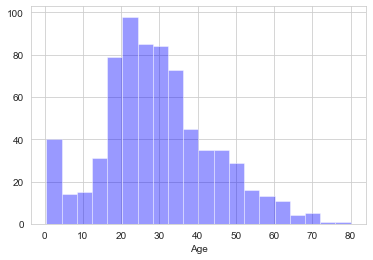

In [21]:
sns.distplot(train['Age'].dropna(),kde=False,color='b',bins=20)

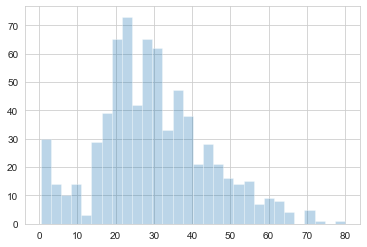

In [22]:
train['Age'].hist(bins=30,alpha=0.3)

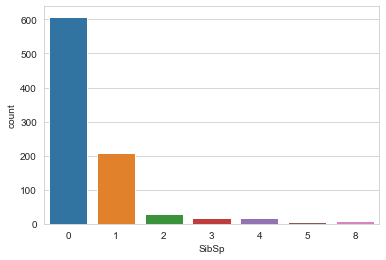

In [24]:
sns.countplot(x='SibSp', data=train)


Data Cleaning

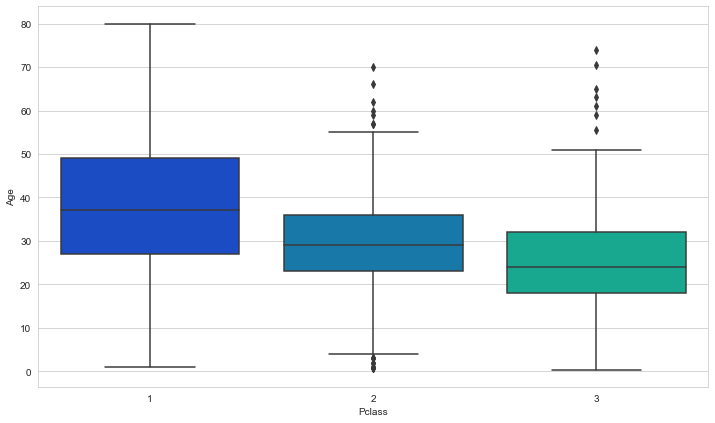

In [26]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age',data=train,palette='winter')

In [33]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
        


In [55]:
train =pd.read_csv('train.csv',index_col='PassengerId')
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [53]:
train['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    24.0
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


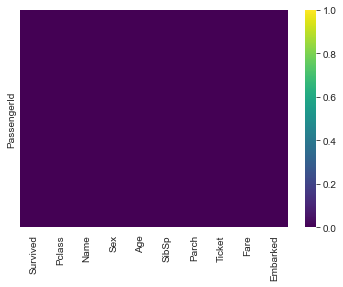

In [59]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')
train.info()

In [57]:
#train.dropna(axis=1,inplace=True)
train.drop('Cabin',axis=1, inplace=True)

In [61]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1


In [62]:
pd.get_dummies(train['Sex'],drop_first=True).head()

,male
PassengerId,
1,1
2,0
3,0
4,0
5,1


In [63]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [65]:
train = pd.concat([train,sex,embark],axis=1)

In [66]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
Splitting Train test data

In [73]:
X=train.drop('Survived',axis=1)
Y=train['Survived']

In [74]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [79]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression(random_state=0)
clr.fit(X_train,Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [81]:
y_pred = clr.predict(X_test)


In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[110  17]
 [ 33  63]]
